In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')

In [2]:
def pipeline_serapara_treineros_TipoEscolas_Enem(arquivo):
    # Colunas a serem lidas no arquivo
    colunas = ["IN_TREINEIRO", 'TP_FAIXA_ETARIA','TP_SEXO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO', "TP_ESCOLA", "SG_UF_ESC", "TP_LOCALIZACAO_ESC", 'Q001', 'Q002', 'Q005', 'Q006', 'Q007', 
                           "Q010", "Q011", "Q012", "Q019", 'Q021', 'Q022', 'Q024', 'Q025'  ]
    
    # Lemos o arquivo, retirando os registros em que um dos valores não estivesse presente.
    df = pd.read_csv(
        arquivo,
        encoding = 'latin1',
        usecols = colunas,
        sep = ';'
    ).dropna()
    
    df["Media_Notas_Objetivas"] = df[['NU_NOTA_CN', 'NU_NOTA_CH',
                                                             'NU_NOTA_LC', 'NU_NOTA_MT']].mean(axis=1)
    
    # Filtramos os registros de com alunos de escolas públicas e privadas (valores 2 e 3 no 
    # campo TP_ESCOLA)
    df = df.loc[df['TP_ESCOLA'].isin([2, 3])]
    
    # df.loc[df['TP_ESCOLA']==2, 'TP_ESCOLA'] = 'Pública'
    # df.loc[df['TP_ESCOLA']==3, 'TP_ESCOLA'] = 'Privada'

    df = df.loc[df["IN_TREINEIRO"]==0].copy()

    df.drop('IN_TREINEIRO', axis=1, inplace=True)

    df = df.loc[(df["NU_NOTA_CN"] != 0) & (df["NU_NOTA_CH"] != 0) & (df["NU_NOTA_LC"] != 0) 
                    & (df["NU_NOTA_MT"] != 0) & (df["NU_NOTA_REDACAO"] != 0) ].copy()
    
    return df

In [3]:
# Carregamos o dataset a partir da cópia do Kaggle
dados = pipeline_serapara_treineros_TipoEscolas_Enem("MICRODADOS_ENEM_2023.csv")



,TP_ESCOLA,SG_UF_ESC,TP_LOCALIZACAO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,...,Q007,Q010,Q011,Q012,Q019,Q021,Q022,Q024,Q025,Media_Notas_Objetivas
3,2,CE,1.0,459.0,508.5,507.2,466.7,880.0,D,D,...,A,A,A,B,B,A,D,A,B,485.350
4,2,CE,1.0,402.5,379.2,446.9,338.3,560.0,B,B,...,A,A,A,B,B,A,B,A,A,391.725
11,2,PR,1.0,608.2,667.6,607.9,691.9,780.0,D,E,...,A,B,A,B,B,A,B,B,B,643.900
16,2,PA,1.0,515.7,553.1,544.4,437.0,880.0,E,E,...,A,A,A,B,B,A,D,A,B,512.550
41,2,SP,1.0,523.8,576.3,596.5,628.1,600.0,C,C,...,A,A,A,B,B,A,B,A,B,581.175


In [4]:
dados

,TP_ESCOLA,SG_UF_ESC,TP_LOCALIZACAO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,...,Q007,Q010,Q011,Q012,Q019,Q021,Q022,Q024,Q025,Media_Notas_Objetivas
3,2,CE,1.0,459.0,508.5,507.2,466.7,880.0,D,D,...,A,A,A,B,B,A,D,A,B,485.350
4,2,CE,1.0,402.5,379.2,446.9,338.3,560.0,B,B,...,A,A,A,B,B,A,B,A,A,391.725
11,2,PR,1.0,608.2,667.6,607.9,691.9,780.0,D,E,...,A,B,A,B,B,A,B,B,B,643.900
16,2,PA,1.0,515.7,553.1,544.4,437.0,880.0,E,E,...,A,A,A,B,B,A,D,A,B,512.550
41,2,SP,1.0,523.8,576.3,596.5,628.1,600.0,C,C,...,A,A,A,B,B,A,B,A,B,581.175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3933919,2,RS,1.0,557.3,546.2,532.3,539.4,600.0,B,E,...,A,B,B,B,B,A,D,A,B,543.800
3933921,2,RS,1.0,585.1,437.6,601.0,554.7,320.0,E,H,...,A,C,A,B,E,B,E,B,B,544.600
3933940,2,RS,1.0,600.7,611.2,661.6,666.2,760.0,E,F,...,A,B,A,B,E,A,E,D,B,634.925
3933944,3,RS,1.0,444.0,511.4,514.8,444.9,600.0,C,E,...,A,C,A,B,D,B,E,B,B,478.775


In [5]:
colunas_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO']

colunas_socioEconomicas = ["TP_ESCOLA", "SG_UF_ESC", "TP_LOCALIZACAO_ESC", 'Q001', 'Q002', 'Q005', 'Q006', 'Q007', 
                           "Q010", "Q011", "Q012", "Q019", 'Q021', 'Q022', 'Q024', 'Q025']

In [9]:
def pipeline_dados_notas_tipoEscola_Enem(arquivo):
    # Colunas a serem lidas no arquivo
    colunas = ["IN_TREINEIRO", 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO', "TP_ESCOLA" ]
    
    # Lemos o arquivo, retirando os registros em que um dos valores não estivesse presente.
    df = pd.read_csv(
        arquivo,
        encoding = 'latin1',
        usecols = colunas,
        sep = ';'
    )


     
    df.dropna(inplace=True)

    df["Media_Notas_Objetivas"] = df[['NU_NOTA_CN', 'NU_NOTA_CH',
                                                             'NU_NOTA_LC', 'NU_NOTA_MT']].mean(axis=1)
    
    # Filtramos os registros de com alunos de escolas públicas e privadas (valores 2 e 3 no 
    # campo TP_ESCOLA)
    df = df.loc[df['TP_ESCOLA'].isin([2, 3])]
    
    # df.loc[df['TP_ESCOLA']==2, 'TP_ESCOLA'] = 'Pública'
    # df.loc[df['TP_ESCOLA']==3, 'TP_ESCOLA'] = 'Privada'

    df = df.loc[df["IN_TREINEIRO"]==0].copy()

    df.drop('IN_TREINEIRO', axis=1, inplace=True)

    # df = df.loc[(df["NU_NOTA_CN"] != 0) & (df["NU_NOTA_CH"] != 0) & (df["NU_NOTA_LC"] != 0) 
    #                & (df["NU_NOTA_MT"] != 0) & (df["NU_NOTA_REDACAO"] != 0) ].copy()
    
    return df

In [10]:
dados_nota_tipoEscola = pipeline_dados_notas_tipoEscola_Enem("MICRODADOS_ENEM_2023.csv")

dados_nota_tipoEscola.shape


(1050858, 7)

In [11]:
colunas = ["IN_TREINEIRO", 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO', "TP_ESCOLA", "SG_UF_ESC", "TP_LOCALIZACAO_ESC", 'Q001', 'Q002', 'Q005', 'Q006', 'Q007', 
                           "Q010", "Q011", "Q012", "Q019", 'Q021', 'Q022', 'Q024', 'Q025'  ]
    
    # Lemos o arquivo, retirando os registros em que um dos valores não estivesse presente.
df = pd.read_csv(
        "MICRODADOS_ENEM_2023.csv",
        encoding = 'latin1',
        usecols = colunas,
        sep = ';'
    )

In [12]:
df.shape

(3933955, 22)

In [13]:
df.isnull().sum()

TP_ESCOLA                   0
IN_TREINEIRO                0
SG_UF_ESC             2975449
TP_LOCALIZACAO_ESC    2975449
NU_NOTA_CN            1241528
NU_NOTA_CH            1111312
NU_NOTA_LC            1111312
NU_NOTA_MT            1241528
NU_NOTA_REDACAO       1111312
Q001                        0
Q002                        0
Q005                        0
Q006                        0
Q007                        0
Q010                        0
Q011                        0
Q012                        0
Q019                        0
Q021                        0
Q022                        0
Q024                        0
Q025                        0
dtype: int64

In [14]:
df.loc[df["TP_ESCOLA"]==2].isnull().sum()

TP_ESCOLA                  0
IN_TREINEIRO               0
SG_UF_ESC             413355
TP_LOCALIZACAO_ESC    413355
NU_NOTA_CN            333101
NU_NOTA_CH            291703
NU_NOTA_LC            291703
NU_NOTA_MT            333101
NU_NOTA_REDACAO       291703
Q001                       0
Q002                       0
Q005                       0
Q006                       0
Q007                       0
Q010                       0
Q011                       0
Q012                       0
Q019                       0
Q021                       0
Q022                       0
Q024                       0
Q025                       0
dtype: int64

In [15]:
df.loc[df["TP_ESCOLA"]==3].isnull().sum()

TP_ESCOLA                 0
IN_TREINEIRO              0
SG_UF_ESC             29300
TP_LOCALIZACAO_ESC    29300
NU_NOTA_CN            12914
NU_NOTA_CH             9844
NU_NOTA_LC             9844
NU_NOTA_MT            12914
NU_NOTA_REDACAO        9844
Q001                      0
Q002                      0
Q005                      0
Q006                      0
Q007                      0
Q010                      0
Q011                      0
Q012                      0
Q019                      0
Q021                      0
Q022                      0
Q024                      0
Q025                      0
dtype: int64

In [16]:
df["IN_TREINEIRO"].value_counts()

IN_TREINEIRO
0    3313888
1     620067
Name: count, dtype: int64

In [17]:
df.loc[df["NU_NOTA_CN"].isnull()]

,TP_ESCOLA,IN_TREINEIRO,SG_UF_ESC,TP_LOCALIZACAO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,...,Q006,Q007,Q010,Q011,Q012,Q019,Q021,Q022,Q024,Q025
0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,...,F,C,C,D,C,B,B,B,A,B
1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,...,H,A,C,A,B,B,A,C,D,B
5,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,...,C,A,A,A,B,B,A,C,A,B
6,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,...,C,A,A,A,B,B,B,B,A,B
7,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,...,A,A,A,A,B,A,A,B,B,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3933941,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,...,D,A,A,A,B,C,A,D,B,B
3933947,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,...,D,A,B,A,B,C,A,D,B,B
3933949,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,...,F,A,C,A,B,D,A,D,B,B
3933952,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,...,B,A,A,A,B,B,A,B,A,B


In [18]:
df.loc[df["NU_NOTA_CH"].isnull()]

,TP_ESCOLA,IN_TREINEIRO,SG_UF_ESC,TP_LOCALIZACAO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,...,Q006,Q007,Q010,Q011,Q012,Q019,Q021,Q022,Q024,Q025
0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,...,F,C,C,D,C,B,B,B,A,B
1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,...,H,A,C,A,B,B,A,C,D,B
5,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,...,C,A,A,A,B,B,A,C,A,B
6,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,...,C,A,A,A,B,B,B,B,A,B
7,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,...,A,A,A,A,B,A,A,B,B,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3933941,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,...,D,A,A,A,B,C,A,D,B,B
3933947,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,...,D,A,B,A,B,C,A,D,B,B
3933949,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,...,F,A,C,A,B,D,A,D,B,B
3933952,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,...,B,A,A,A,B,B,A,B,A,B


In [19]:
df.loc[(df["NU_NOTA_CH"].isnull()) & (df["NU_NOTA_CN"].isnull()) ]

,TP_ESCOLA,IN_TREINEIRO,SG_UF_ESC,TP_LOCALIZACAO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,...,Q006,Q007,Q010,Q011,Q012,Q019,Q021,Q022,Q024,Q025
0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,...,F,C,C,D,C,B,B,B,A,B
1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,...,H,A,C,A,B,B,A,C,D,B
5,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,...,C,A,A,A,B,B,A,C,A,B
6,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,...,C,A,A,A,B,B,B,B,A,B
7,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,...,A,A,A,A,B,A,A,B,B,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3933941,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,...,D,A,A,A,B,C,A,D,B,B
3933947,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,...,D,A,B,A,B,C,A,D,B,B
3933949,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,...,F,A,C,A,B,D,A,D,B,B
3933952,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,...,B,A,A,A,B,B,A,B,A,B


In [22]:
fizeramAlgumaProva = df.dropna(subset=["NU_NOTA_CH", "NU_NOTA_CN"], how="all")

In [23]:
fizeramAlgumaProva.shape

(2836806, 22)

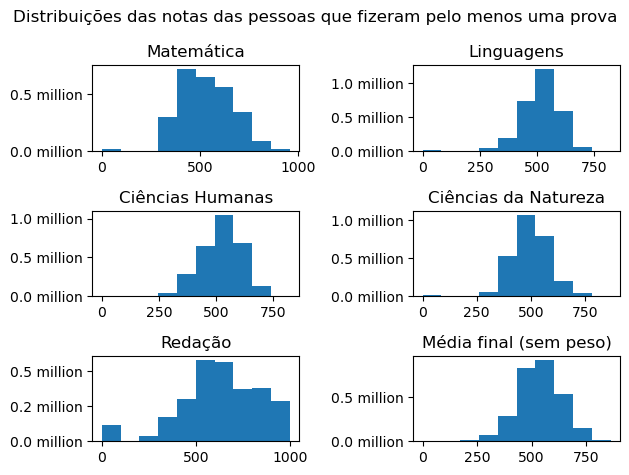

In [29]:
from matplotlib.ticker import NullFormatter
def formatter(x, pos):
    return str(round(x / 1e6, 1)) + " million"

fig, ax = plt.subplots(3,2)
for x in range(3):
    for y in range(2):
        ax[x][y].yaxis.set_major_formatter(formatter)
        ax[x][y].yaxis.set_minor_formatter(NullFormatter())
subset = fizeramAlgumaProva.filter(items=['NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_REDACAO'])
subset.columns = ['Matemática','Linguagens','Ciências Humanas','Ciências da Natureza','Redação']
subset['Média final (sem peso)'] = subset.mean(axis=1)
subset.hist(grid=False, ax=ax)
plt.suptitle('Distribuições das notas das pessoas que fizeram pelo menos uma prova');
plt.tight_layout()

In [24]:
fizeramAlgumaProva.loc[(df["NU_NOTA_CH"].isnull())]

,TP_ESCOLA,IN_TREINEIRO,SG_UF_ESC,TP_LOCALIZACAO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,...,Q006,Q007,Q010,Q011,Q012,Q019,Q021,Q022,Q024,Q025
72,1,0,NaN,NaN,476.5,NaN,NaN,470.6,NaN,B,...,A,A,A,A,B,A,A,C,A,A
153,1,0,NaN,NaN,466.0,NaN,NaN,415.9,NaN,A,...,A,A,A,A,B,B,A,B,A,A
227,1,0,NaN,NaN,509.1,NaN,NaN,604.6,NaN,E,...,D,A,B,A,B,B,A,E,A,B
952,2,0,NaN,NaN,454.5,NaN,NaN,597.1,NaN,C,...,B,A,A,A,B,B,A,E,B,B
1975,2,0,AM,1.0,539.3,NaN,NaN,547.2,NaN,E,...,G,A,B,A,C,B,A,E,C,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3932441,2,0,RJ,1.0,468.7,NaN,NaN,622.6,NaN,D,...,C,A,A,A,B,B,A,D,B,B
3932985,1,1,NaN,NaN,455.8,NaN,NaN,551.6,NaN,F,...,F,A,C,A,C,E,B,E,C,B
3932987,1,0,NaN,NaN,419.2,NaN,NaN,403.9,NaN,B,...,E,A,B,A,B,B,A,E,A,B
3933209,2,0,NaN,NaN,484.6,NaN,NaN,474.9,NaN,F,...,E,A,A,A,B,B,A,C,C,B


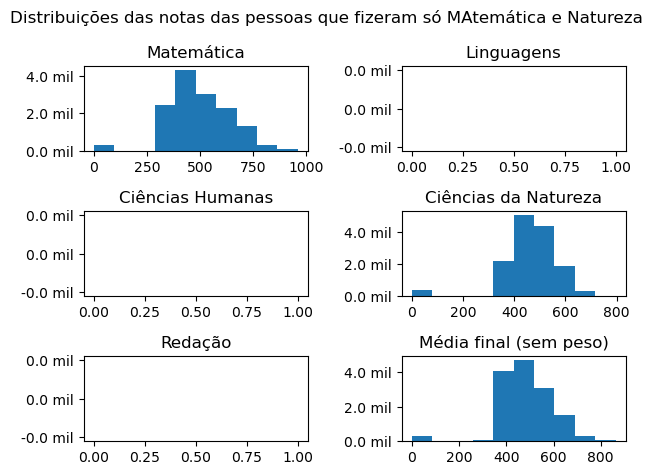

In [31]:
from matplotlib.ticker import NullFormatter
def formatter(x, pos):
    return str(round(x / 1e3, 1)) + " mil"

fig, ax = plt.subplots(3,2)
for x in range(3):
    for y in range(2):
        ax[x][y].yaxis.set_major_formatter(formatter)
        ax[x][y].yaxis.set_minor_formatter(NullFormatter())
subset = fizeramAlgumaProva.loc[(df["NU_NOTA_CH"].isnull())].filter(items=['NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_REDACAO'])
subset.columns = ['Matemática','Linguagens','Ciências Humanas','Ciências da Natureza','Redação']
subset['Média final (sem peso)'] = subset.mean(axis=1)
subset.hist(grid=False, ax=ax)
plt.suptitle('Distribuições das notas das pessoas que fizeram só MAtemática e Natureza');
plt.tight_layout()

In [25]:
fizeramAlgumaProva.loc[(df["NU_NOTA_CN"].isnull())]

,TP_ESCOLA,IN_TREINEIRO,SG_UF_ESC,TP_LOCALIZACAO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,...,Q006,Q007,Q010,Q011,Q012,Q019,Q021,Q022,Q024,Q025
43,1,0,NaN,NaN,NaN,509.0,443.6,NaN,540.0,H,...,E,A,A,A,B,B,A,E,B,B
118,1,0,NaN,NaN,NaN,594.4,515.7,NaN,540.0,B,...,B,A,A,B,B,B,A,C,A,A
163,2,0,SP,1.0,NaN,327.5,577.5,NaN,560.0,B,...,B,A,B,A,B,C,B,E,A,B
194,2,0,GO,1.0,NaN,468.9,475.2,NaN,0.0,A,...,B,A,A,A,B,B,A,D,A,A
195,2,0,NaN,NaN,NaN,368.1,329.8,NaN,0.0,A,...,B,A,B,B,B,B,A,B,A,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3933742,1,1,NaN,NaN,NaN,480.4,428.9,NaN,0.0,E,...,B,A,A,A,B,A,A,C,B,B
3933774,1,1,NaN,NaN,NaN,539.7,503.2,NaN,600.0,C,...,G,A,C,C,B,B,B,E,A,B
3933793,2,0,RS,1.0,NaN,539.4,487.2,NaN,600.0,B,...,D,A,B,B,B,B,A,C,B,B
3933802,1,0,NaN,NaN,NaN,644.9,651.1,NaN,720.0,F,...,E,A,A,A,B,B,A,C,D,B


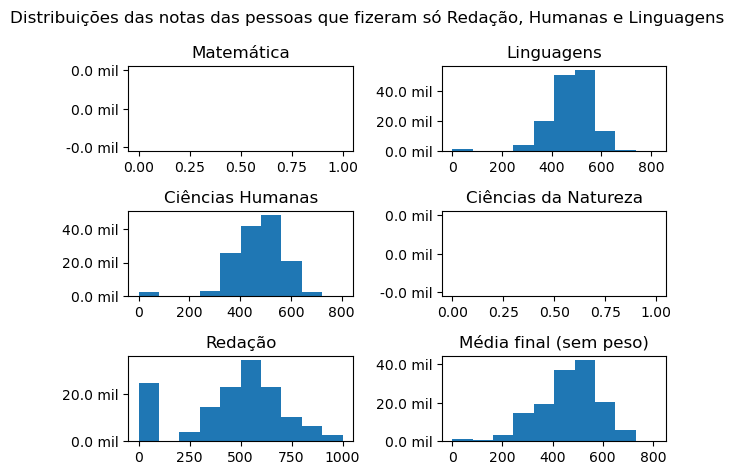

In [32]:
from matplotlib.ticker import NullFormatter
def formatter(x, pos):
    return str(round(x / 1e3, 1)) + " mil"

fig, ax = plt.subplots(3,2)
for x in range(3):
    for y in range(2):
        ax[x][y].yaxis.set_major_formatter(formatter)
        ax[x][y].yaxis.set_minor_formatter(NullFormatter())
subset = fizeramAlgumaProva.loc[(df["NU_NOTA_CN"].isnull())].filter(items=['NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_REDACAO'])
subset.columns = ['Matemática','Linguagens','Ciências Humanas','Ciências da Natureza','Redação']
subset['Média final (sem peso)'] = subset.mean(axis=1)
subset.hist(grid=False, ax=ax)
plt.suptitle('Distribuições das notas das pessoas que fizeram só Redação, Humanas e Linguagens');
plt.tight_layout()

Analisando a distribuição de idades dos participantes.

In [ ]:
def raw_to_list(text):
    return text.strip().split('\n')
faixas_etarias = raw_to_list('''Menor de 17 anos
17 anos
18 anos
19 anos
20 anos
21 anos
22 anos
23 anos
24 anos
25 anos
Entre 26 e 30 anos
Entre 31 e 35 anos
Entre 36 e 40 anos
Entre 41 e 45 anos
Entre 46 e 50 anos
Entre 51 e 55 anosa
Entre 56 e 60 anos
Entre 61 e 65 anos
Entre 66 e 70 anos
Maior de 70 anos
''')

sns.barplot(
  x=dados.TP_FAIXA_ETARIA.value_counts().sort_index().values, 
  y=faixas_etarias, 
  orient='h', 
  palette='muted').set_title('Idade dos participantes');

Analisando a distribuilção entre o sexo dos participantes.

In [ ]:
def formatter(x, pos):
    return str(round(x / 1e6, 1)) + " million"

ax = dados.TP_SEXO.hist(grid=False)
ax.yaxis.set_major_formatter(formatter)
ax.yaxis.set_minor_formatter(NullFormatter())
ax.set_title('Sexo dos participantes')
ax.xaxis.set_ticks(['M','F'])
ax.set_xticklabels(['Masculino','Feminino']);

Entrando um pouco na problemática: Análise de notas obtidas na redação por tipo de escola.

In [ ]:
tp_escola = ['Pública','Privada']
grouped_by_escola = dados[dados.TP_ESCOLA!=1].filter(items=['TP_ESCOLA', 'NU_NOTA_REDACAO']).groupby('TP_ESCOLA')
sns.barplot(x=tp_escola, y=grouped_by_escola.mean().NU_NOTA_REDACAO, palette='pastel').set_title('Notas na redação, por tipo de escola');